**Estudante/Matrícula**: Gabriel Henrique Menoncin 2121101065



# Trabalho T1 - Arquitetura Básica de Redes Neurais

Este trabalho tem como objetivo a compreensão da arquitetura básica de camadas de neurônios de uma rede neural artificial (RNA). A execução deste exercício permitirá aos estudantes o domínio dos métodos necessários para o treinamento e teste de uma RNA utilizando um dataset pré-processado.

## 1. Instruções


O estudante deve treinar uma RNA com camadas densas e estilo feedforward para uma tarefa de classificação utilizando dataset pré-processado conforme especificado a baixo.

Para cada tentativa de construção de arquitetura, mantenha um registro da tentativa e resultado obtido pela rede. Indique qual a lógica utilizada para criação da arquitetura e qual a percepção do resultado em comparação com tentativas anteriores.

Para este trabalho, somente serão permitidas somente as seguintes bibliotecas `python` para o treinamento da RNA:

- `numpy`
- `scipy`
- `tensorflow`
- `scikit-learn`

Para visualização e criação de gráficos, também serão permitidas

- `matplotlib`
- `seaborn`
- `plotly`
- `yellowbrick`

Caso a utilização de quaisquer outras bibliotecas se faça necessária, uma consulta prévia deve ser feita ao professor.


## Entrega

O presente trabalho pode ser feito individualmente ou em dupla. Caso optem pelo trabalho em dupla, o cabeçalho do documento deve indicar quais são os componentes e suas matrículas.

A entrega deverá ser feita através do envio de um arquivo `ZIP` contendo o trabalho dos estudantes, no SIGAA. A data limite para entrega deste trabalho é **24/09/2023, 23h59m**.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(42)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
# https://keras.io/getting_started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
tf.random.set_seed(42)


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 1s 0us/step


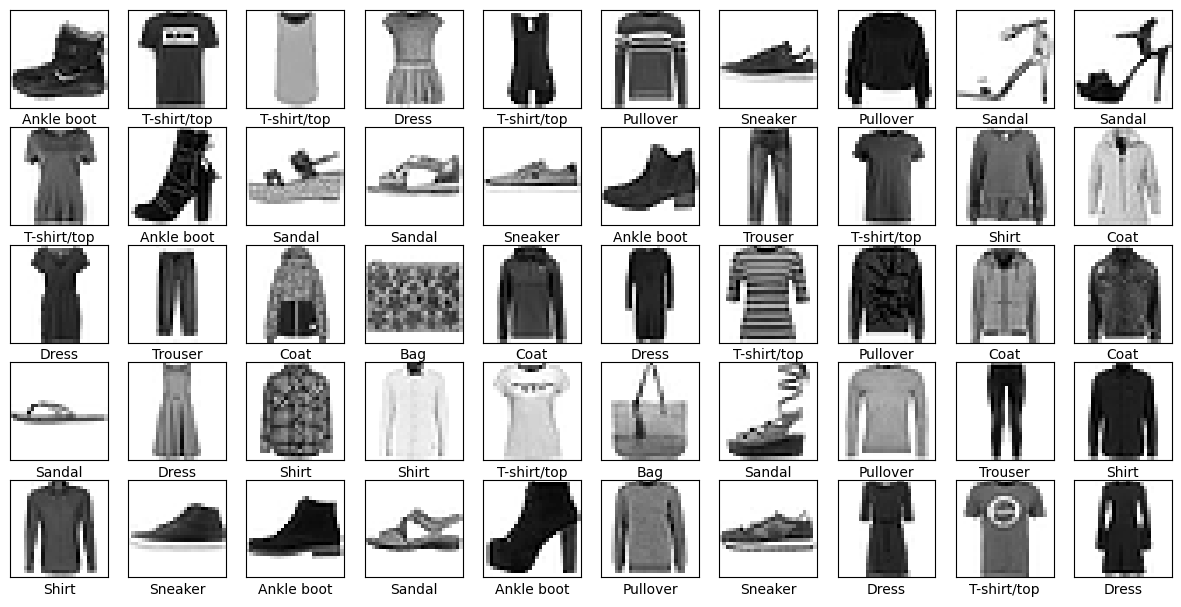

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
class_names = ['Non-Top', 'Top']
num_classes = 2

train_labels = np.where(((train_labels == 1) |  (train_labels == 5) | (train_labels == 7) | (train_labels == 8) | (train_labels == 9)), 0, 1)
test_labels = np.where(((test_labels == 1) |  (test_labels == 5) | (test_labels == 7) | (test_labels == 8) | (test_labels == 9)), 0, 1)

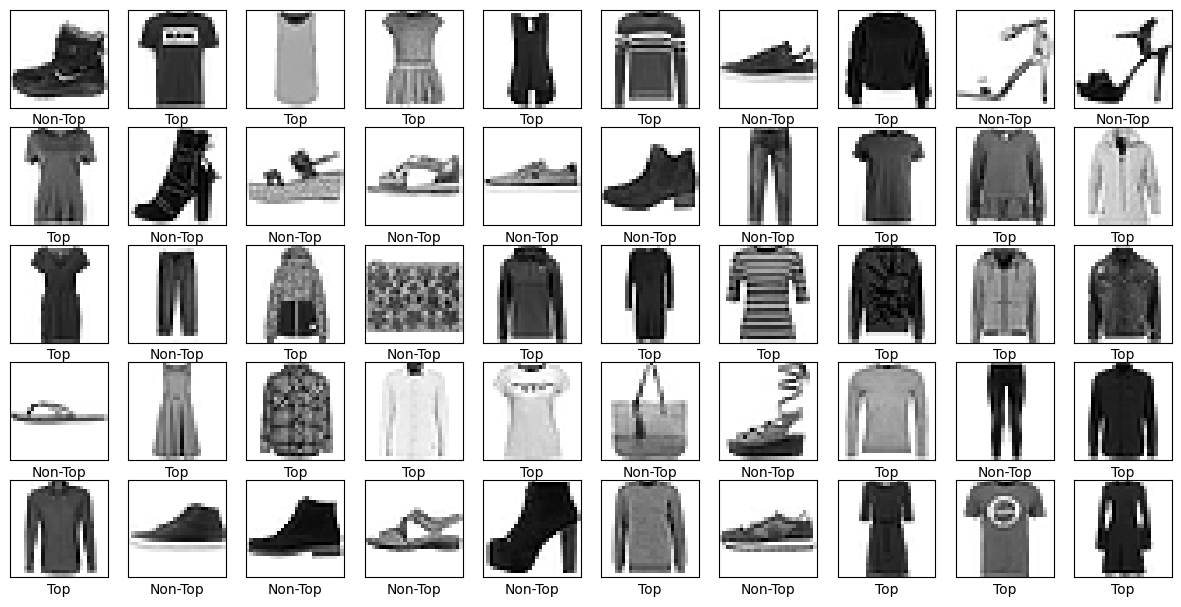

In [ ]:
plt.figure(figsize=(15,15))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
x_train = train_images.reshape(60000, 784)  ## reorganizando o dataset de treino em 60000 exemplos com 784 features cada
x_test = test_images.reshape(10000, 784)  ## reorganizando o dataset de teste em 60000 exemplos com 784 features cada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f'{x_train.shape[0]} exemplos de treino')
print(f'{x_test.shape[0]} exemplos de teste')

y_train = tf.keras.utils.to_categorical(train_labels, num_classes) ## transformando os targets do dataset de treino em classes
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)  ## transformando os targets do dataset de teste em classes

60000 exemplos de treino
10000 exemplos de teste


## Inclua seu código abaixo desta célula

Nome: Gabriel Henrique Menoncin

Matricula: 2121101065

Epoch 1/30
118/118 [==============================] - 1s 6ms/step - loss: 0.3438 - accuracy: 0.8671 - val_loss: 0.2126 - val_accuracy: 0.9394
Epoch 2/30
118/118 [==============================] - 1s 6ms/step - loss: 0.1915 - accuracy: 0.9428 - val_loss: 0.1609 - val_accuracy: 0.9517
Epoch 3/30
118/118 [==============================] - 1s 5ms/step - loss: 0.1542 - accuracy: 0.9552 - val_loss: 0.1377 - val_accuracy: 0.9574
Epoch 4/30
118/118 [==============================] - 1s 6ms/step - loss: 0.1355 - accuracy: 0.9598 - val_loss: 0.1244 - val_accuracy: 0.9608
Epoch 5/30
118/118 [==============================] - 1s 5ms/step - loss: 0.1246 - accuracy: 0.9630 - val_loss: 0.1157 - val_accuracy: 0.9631
Epoch 6/30
118/118 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.9652 - val_loss: 0.1096 - val_accuracy: 0.9656
Epoch 7/30
118/118 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.9675 - val_loss: 0.1051 - val_accuracy: 0.9674
Epoch 

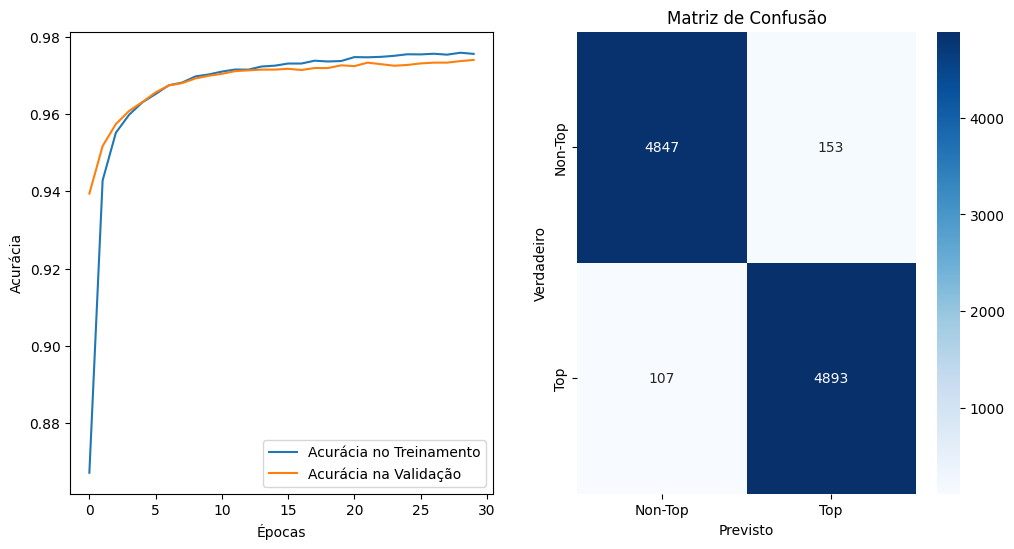

              precision    recall  f1-score   support

     Non-Top       0.98      0.97      0.97      5000
         Top       0.97      0.98      0.97      5000

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# Criando o modelo
modelo = tf.keras.models.Sequential()

# Adicionando a primeira camada densa com 32 neurônios e função de ativação tanh
modelo.add(tf.keras.layers.Dense(32, activation='tanh', input_shape=(784,)))

# Adicionando uma camada de Dropout com taxa de 0.3
modelo.add(tf.keras.layers.Dropout(0.3))

# Adicionando a camada de saída com número de neurônios igual ao número de classes e função de ativação softmax
modelo.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compilando o modelo com otimizador SGD, função de perda entropia cruzada categórica e métrica acurácia
modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo por 30 épocas com tamanho de lote 512
historico = modelo.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Plotando a curva de aprendizado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plotando a matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')

plt.show()

# Exibindo métricas de avaliação
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Aqui estou criando um modelo sequencial usando a biblioteca Keras do TensorFlow.
Um modelo sequencial é apropriado para uma pilha simples de camadas onde cada camada tem exatamente um tensor de entrada e um tensor de saída.

`modelo.add(tf.keras.layers.Dense(32, activation='tanh', input_shape=(784,)))`:
Esta é a primeira camada do nosso modelo, uma camada densa (ou totalmente conectada) com 32 neurônios e função de ativação tanh.
A forma de entrada é (784,), o que significa que estamos esperando dados de entrada com 784 características.

`modelo.add(tf.keras.layers.Dropout(0.3))`: Esta é uma camada de Dropout. Durante o treinamento, ela vai “desligar” aleatoriamente 30% dos neurônios da camada anterior, o que ajuda a prevenir o overfitting.

`modelo.add(tf.keras.layers.Dense(num_classes, activation='softmax'))`: Esta é a última camada do nosso modelo, outra camada densa. O número de neurônios é igual ao número de classes que queremos prever e a função de ativação é Softmax, que é comumente usada em problemas de classificação multiclasse.

`modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])`: Aqui estamos compilando o modelo. Estamos usando o otimizador SGD (Gradiente Descendente Estocástico), a função de perda entropia cruzada categórica (comum em problemas de classificação multiclasse) e vamos acompanhar a acurácia durante o treinamento.

`historico = modelo.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test))`: Aqui estou treinando o modelo. Os dados de treino são x_train e y_train, vamos treinar por 30 épocas, o tamanho do lote é 512 e também passamos dados de validação para acompanhar a performance do modelo em dados não vistos durante o treinamento.

O restante das linhas são para visualizar os resultados do treinamento. Primeiro plotamos a acurácia no conjunto de treino e validação ao longo das épocas. Depois plotamos uma matriz de confusão para ver como nosso modelo se saiu em cada classe nos dados de teste.
Por fim, imprimimos um relatório de classificação com várias métricas (precisão, recall, f1-score) para cada classe.


Epoch 1/25
200/200 [==============================] - 2s 7ms/step - loss: 0.2589 - accuracy: 0.9025 - val_loss: 0.1620 - val_accuracy: 0.9501
Epoch 2/25
200/200 [==============================] - 1s 5ms/step - loss: 0.1407 - accuracy: 0.9572 - val_loss: 0.1248 - val_accuracy: 0.9615
Epoch 3/25
200/200 [==============================] - 1s 5ms/step - loss: 0.1161 - accuracy: 0.9661 - val_loss: 0.1097 - val_accuracy: 0.9659
Epoch 4/25
200/200 [==============================] - 1s 4ms/step - loss: 0.1037 - accuracy: 0.9689 - val_loss: 0.1008 - val_accuracy: 0.9684
Epoch 5/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0972 - accuracy: 0.9708 - val_loss: 0.0952 - val_accuracy: 0.9702
Epoch 6/25
200/200 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9720 - val_loss: 0.0911 - val_accuracy: 0.9716
Epoch 7/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0880 - accuracy: 0.9736 - val_loss: 0.0881 - val_accuracy: 0.9721
Epoch 

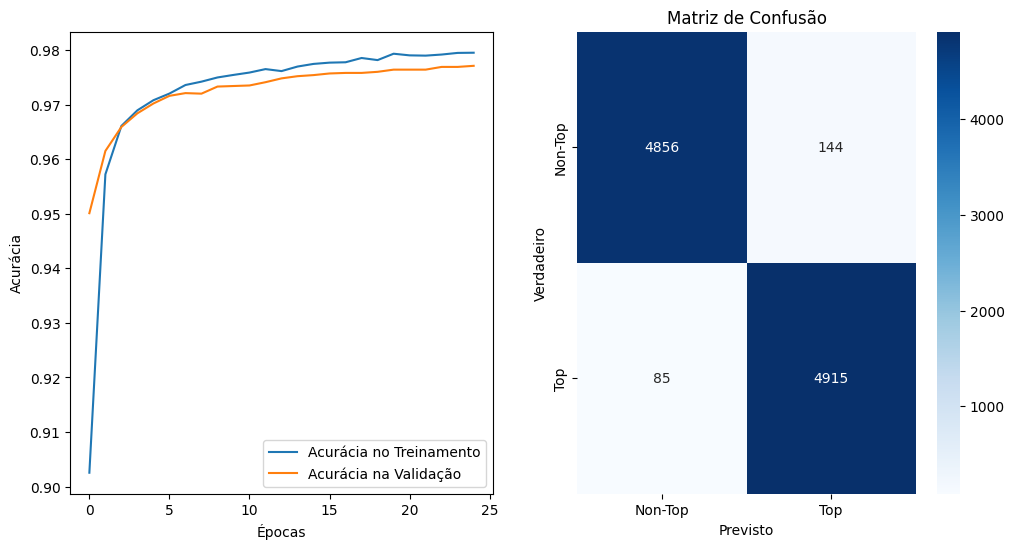

              precision    recall  f1-score   support

     Non-Top       0.98      0.97      0.98      5000
         Top       0.97      0.98      0.98      5000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Criando o modelo
modelo = tf.keras.models.Sequential()

# Adicionando a primeira camada densa com 50 neurônios e função de ativação tanh
modelo.add(tf.keras.layers.Dense(50, activation='tanh', input_shape=(784,)))

# Adicionando uma camada de Dropout com taxa de 0.2
modelo.add(tf.keras.layers.Dropout(0.2))

# Adicionando a camada de saída com número de neurônios igual ao número de classes e função de ativação softmax
modelo.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compilando o modelo com otimizador SGD, função de perda entropia cruzada categórica e métrica acurácia
modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo por 25 épocas com tamanho de lote 300
historico = modelo.fit(x_train, y_train, epochs=25, batch_size=300, validation_data=(x_test, y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Plotando a curva de aprendizado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plotando a matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')

plt.show()

# Exibindo métricas de avaliação
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Neste código modificado:

Aumentei o número de neurônios na primeira camada para 50.

Diminuí a taxa da camada de Dropout para 0.2.

Aumentei o número de épocas para 25.

Aumentei o tamanho do lote para 300.



Epoch 1/25
200/200 [==============================] - 2s 5ms/step - loss: 0.0998 - accuracy: 0.9689 - val_loss: 0.0553 - val_accuracy: 0.9829
Epoch 2/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0522 - accuracy: 0.9850 - val_loss: 0.0460 - val_accuracy: 0.9860
Epoch 3/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 4/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0387 - val_accuracy: 0.9879
Epoch 5/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0346 - val_accuracy: 0.9885
Epoch 6/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0371 - val_accuracy: 0.9869
Epoch 7/25
200/200 [==============================] - 1s 4ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0373 - val_accuracy: 0.9883
Epoch 

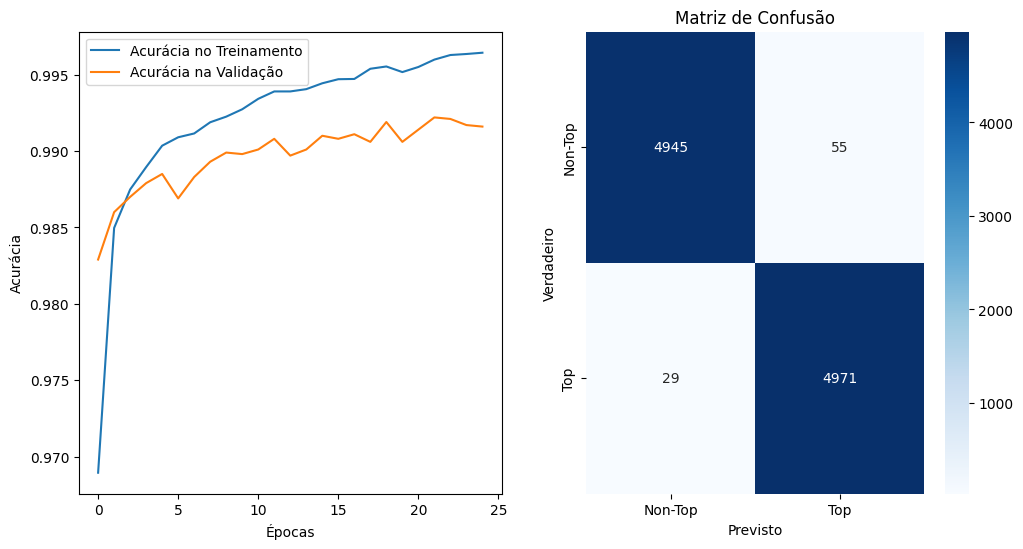

              precision    recall  f1-score   support

     Non-Top       0.99      0.99      0.99      5000
         Top       0.99      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Criando o modelo
modelo = tf.keras.models.Sequential()

# Adicionando a primeira camada densa com 64 neurônios e função de ativação ReLU
modelo.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)))

# Adicionando uma camada de Dropout com taxa de 0.2
modelo.add(tf.keras.layers.Dropout(0.2))

# Adicionando uma segunda camada densa com 32 neurônios e função de ativação ReLU
modelo.add(tf.keras.layers.Dense(32, activation='relu'))

# Adicionando a camada de saída com número de neurônios igual ao número de classes e função de ativação softmax
modelo.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compilando o modelo com otimizador Adam, função de perda entropia cruzada categórica e métrica acurácia
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo por 25 épocas com tamanho de lote 300
historico = modelo.fit(x_train, y_train, epochs=25, batch_size=300, validation_data=(x_test, y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Plotando a curva de aprendizado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plotando a matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')

plt.show()

# Exibindo métricas de avaliação
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Aumentei o número de neurônios na primeira camada para 64.

Mudei a função de ativação da primeira camada para ‘relu’.

Adicionei uma segunda camada densa com 32 neurônios e função de ativação ‘relu’.

Mudei o otimizador para ‘adam’.

Reduzi o número de épocas para 25.

Epoch 1/50
100/100 [==============================] - 2s 6ms/step - loss: 0.1231 - accuracy: 0.9567 - val_loss: 0.0621 - val_accuracy: 0.9810
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0535 - accuracy: 0.9845 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9872 - val_loss: 0.0433 - val_accuracy: 0.9871
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9891 - val_loss: 0.0397 - val_accuracy: 0.9881
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9886
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0345 - val_accuracy: 0.9893
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0299 - val_accuracy: 0.9909
Epoch 

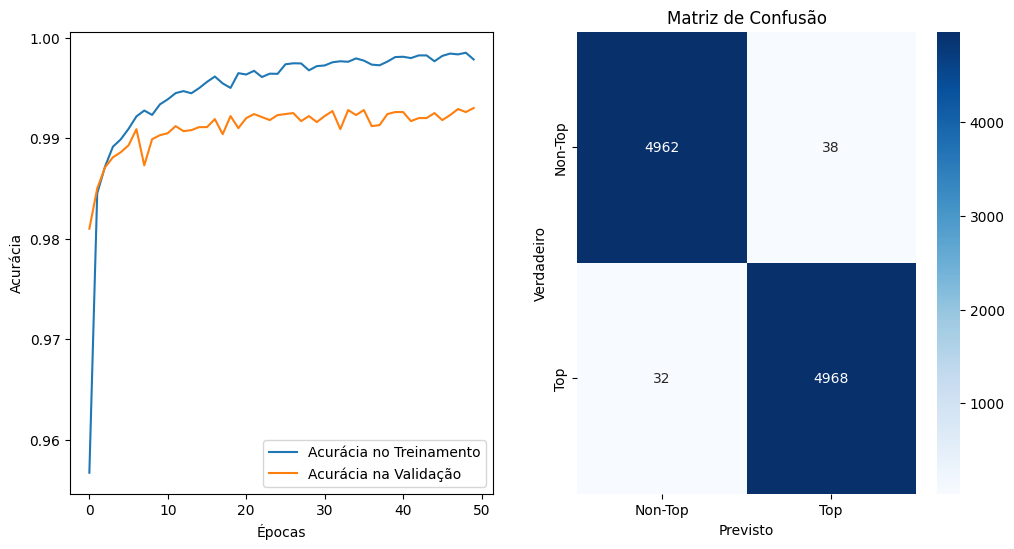

              precision    recall  f1-score   support

     Non-Top       0.99      0.99      0.99      5000
         Top       0.99      0.99      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Criando o modelo
modelo = tf.keras.models.Sequential()

# Adicionando a primeira camada densa com 100 neurônios e função de ativação ReLU
modelo.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(784,)))

# Adicionando uma camada de Dropout com taxa de 0.2
modelo.add(tf.keras.layers.Dropout(0.2))

# Adicionando uma segunda camada densa com 60 neurônios e função de ativação ReLU
modelo.add(tf.keras.layers.Dense(60, activation='relu'))

# Adicionando a camada de saída com número de neurônios igual ao número de classes e função de ativação softmax
modelo.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compilando o modelo com otimizador Adam, função de perda entropia cruzada categórica e métrica acurácia
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo por 50 épocas com tamanho de lote 600
historico = modelo.fit(x_train, y_train, epochs=50, batch_size=600, validation_data=(x_test, y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Plotando a curva de aprendizado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plotando a matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')

plt.show()

# Exibindo métricas de avaliação
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Aumenteio número de neurônios na primeira camada para 100.

Adicionei uma segunda camada densa com 60 neurônios e função de ativação ‘relu’.

Aumentei o número de épocas para 50.

Aumentei o tamanho do lote para 600.

Epoch 1/100
469/469 [==============================] - 4s 5ms/step - loss: 0.0716 - accuracy: 0.9776 - val_loss: 0.0453 - val_accuracy: 0.9862
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0397 - val_accuracy: 0.9871
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0347 - val_accuracy: 0.9883
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0366 - val_accuracy: 0.9881
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0347 - val_accuracy: 0.9904

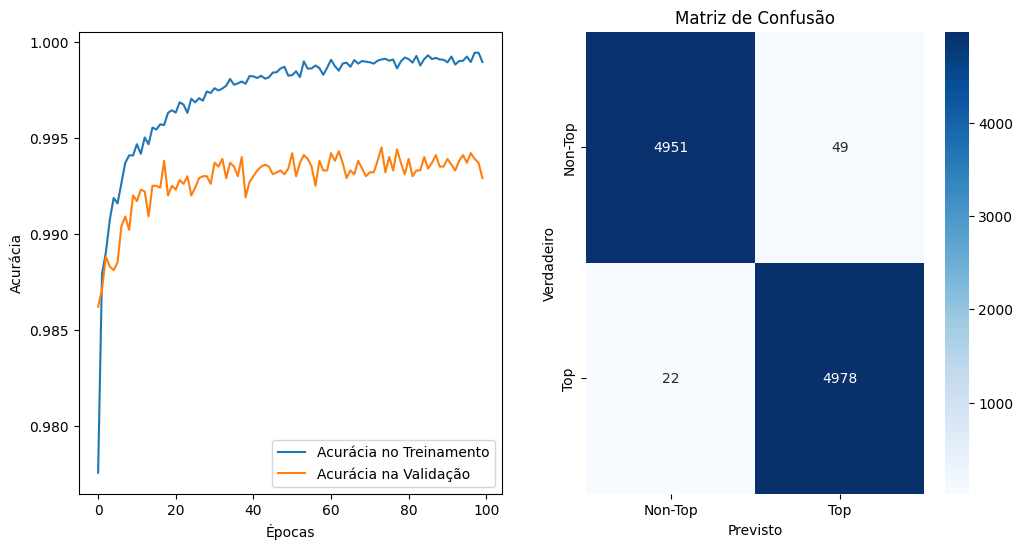

              precision    recall  f1-score   support

     Non-Top       1.00      0.99      0.99      5000
         Top       0.99      1.00      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Criando o modelo
modelo = tf.keras.models.Sequential()

# Adicionando a primeira camada densa com 200 neurônios e função de ativação ReLU
modelo.add(tf.keras.layers.Dense(200, activation='relu', input_shape=(784,)))

# Adicionando uma camada de Dropout com taxa de 0.2
modelo.add(tf.keras.layers.Dropout(0.2))

# Adicionando uma segunda camada densa com 100 neurônios e função de ativação ReLU
modelo.add(tf.keras.layers.Dense(100, activation='relu'))

# Adicionando uma terceira camada densa com 60 neurônios e função de ativação ReLU
modelo.add(tf.keras.layers.Dense(60, activation='relu'))

# Adicionando a camada de saída com número de neurônios igual ao número de classes e função de ativação softmax
modelo.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compilando o modelo com otimizador Adam, função de perda entropia cruzada categórica e métrica acurácia
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo por 100 épocas com tamanho de lote 128
historico = modelo.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Plotando a curva de aprendizado
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historico.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plotando a matriz de confusão
y_pred = modelo.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')

plt.show()

# Exibindo métricas de avaliação
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Aumentei o número de neurônios na primeira camada para 200.

Adicionei uma segunda camada densa com 100 neurônios e função de ativação ‘relu’.

Aumentei o número de neurônios na terceira camada para 60.

Aumentei o número de épocas para 100.

Diminuí o tamanho do lote para 128.